In [1]:
from pygdsm import GlobalSkyModel2016
import healpy as hp
import numpy as np
from numpy.linalg import svd
from scipy.special import eval_legendre
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

import src.beam_functions as BF
import src.spherical_harmonics as SH
import src.forward_model as FM
import src.sky_models as SM
import src.map_making as MM
import src.plotting as PL
from src.blockmat import BlockMatrix, BlockVector
from anstey.generate import T_CMB

RS = SH.RealSphericalHarmonics()

In [39]:
nuarr = 60
lmax  = 8
nside = lmax
seed = 123
sigma = 0.0851
sigma_T = sigma * np.log(408/nuarr)

_, gsma_map = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, original_map=True)
gsma_map = gsma_map[0]
_, fg_map = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, 
                               delta=sigma, seed=seed, original_map=True)
# Generate a series of these
fg_maps = []
for i in range(500):
    _, m = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, 
                               delta=sigma, seed=seed+i, original_map=True)
    fg_maps.append(m[0])

successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successful

In [40]:
np.shape(fg_maps)

(500, 768)

In [41]:
# Calculate the mean and covariance of the error instances.
fg_samplemean = np.mean(fg_maps, axis=0)
fg_samplestd = np.std(fg_maps, axis=0)

In [42]:
sigma_T

0.16313011429669338

In [43]:
(np.exp(2*sigma_T**2)-np.exp(sigma_T**2))

0.02769599002681633

In [44]:
# Compare this to the analytic mean and covariance of the error instance distribution.
fg_analmean = (gsma_map-T_CMB)*np.exp(sigma_T**2/2) + T_CMB
fg_analcov  = (gsma_map-T_CMB)**2 * (np.exp(2*sigma_T**2)-np.exp(sigma_T**2))

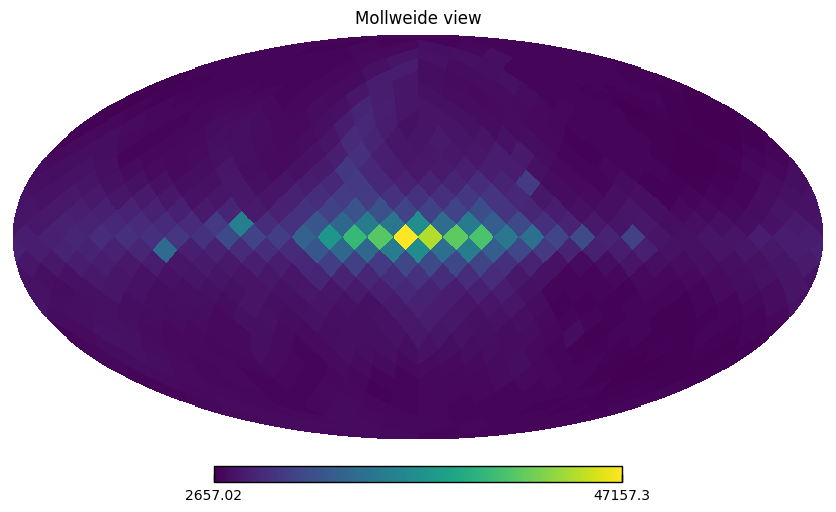

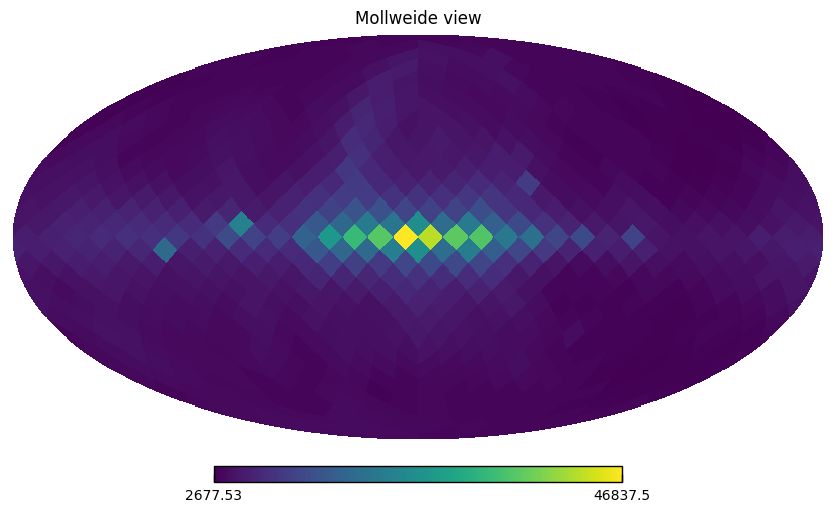

In [45]:
hp.mollview(fg_samplemean)
plt.show()
hp.mollview(fg_analmean)
plt.show()

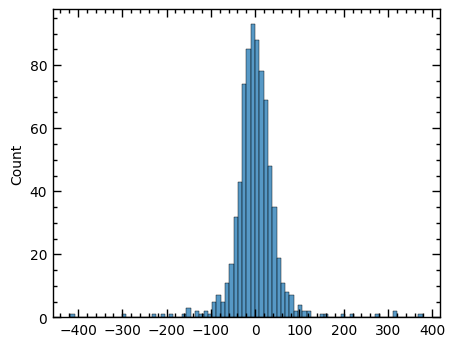

In [46]:
sns.histplot(fg_samplemean-fg_analmean)
plt.show()

<Axes: ylabel='Count'>

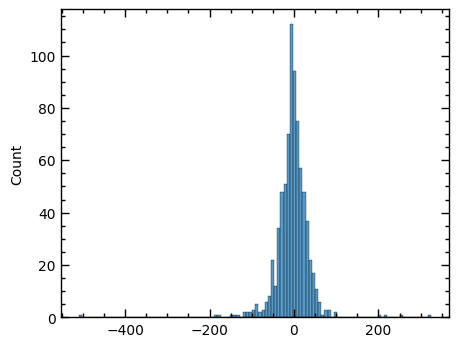

In [47]:
sns.histplot(fg_samplestd-np.sqrt(fg_analcov))

In [48]:
def get_sigma(d, mu, cov):
    return np.mean((d-mu)**2 / cov)


In [49]:
# Show that the distribution of sampled error instances is Gaussian?
sigmas = []
for fg_map in fg_maps:
    sigmas.append(get_sigma(fg_map, gsma_map, fg_analcov))
    

Text(0.5, 0, 'deviation in $\\sigma_T$ per pixel of each error instance')

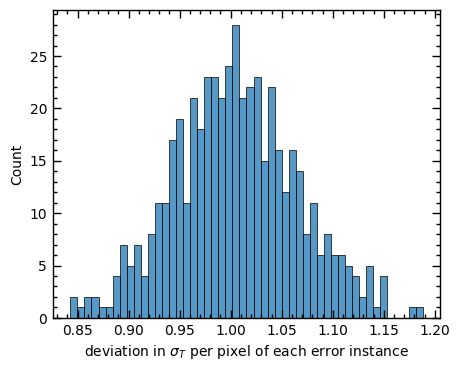

In [50]:
sns.histplot(sigmas, bins=50)
plt.xlabel(r"deviation in $\sigma_T$ per pixel of each error instance")

In [ ]:
# Choose one that's kind of in the centre with chi = 1.